# Tunning Hist Gradient Boosting Regressor

In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data

from sklearn.model_selection import train_test_split

X = pd.read_csv('../data/xtrain.csv')
y = pd.read_csv('../data/ytrain.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_control = pd.read_csv('../data/xtest.csv')
y_control = pd.read_csv('../data/ytest.csv')

In [3]:
from matplotlib.legend_handler import HandlerLine2D
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score


def get_r2(model, train=True):

    model.fit(X_train, y_train)
    if train:
        train_pred = model.predict(X_train)
        return r2_score(y_train, train_pred)
    else:
        test_pred = model.predict(X_test)   
        return r2_score(y_test, test_pred)


def create_plot(name, iterator, train, test):

    plt.plot(iterator, train_results, '#ff9900', label='Train R2')
    plt.plot(iterator, test_results, '#ffc1de', label='Test R2')
    plt.title(f'R2 vs {name}')
    plt.legend()
    plt.ylabel('$R^2$')
    plt.xlabel(f'{name}')
    plt.show()


def create_table(name, iterator, train, test):

    results = pd.DataFrame()
    results[name] = iterator
    results['TrainScore'] = train_results
    results['TestScore'] = test_results
    return results

#### Learning rate

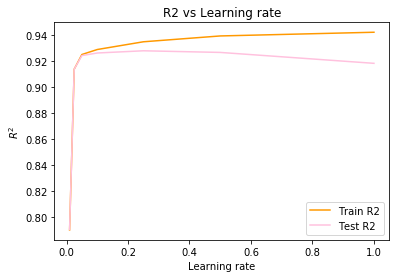

In [61]:
# Find best learning rate

learning_rates = [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
name = 'Learning rate'

# Get scores and plot
train_results = []
test_results = []
for value in learning_rates:
    model = HistGradientBoostingRegressor(learning_rate=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_lr = create_table(name, learning_rates, train_results, test_results)
create_plot(name, learning_rates, train_results, test_results)

In [66]:
result_lr

,Learning rate,TrainScore,TestScore
0,0.010,0.790162,0.790511
1,0.025,0.913928,0.913961
2,0.050,0.925222,0.924397
3,0.100,0.929066,0.926385
4,0.250,0.935024,0.928092
5,0.500,0.939516,0.926830
6,1.000,0.942368,0.918432


Se puede ver que para el intervalo de (0.05-0.5)
se tiene el mejor score, además de que no existe 
overfitting. 

#### Max depth

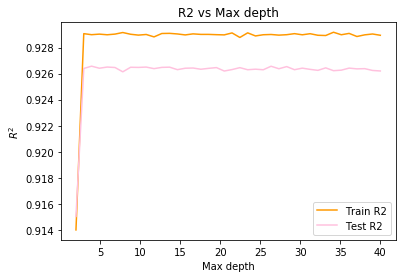

In [67]:
# Procces

max_depth = np.linspace(2,40,40 ,endpoint=True)
iterator = max_depth
name = 'Max depth'

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = HistGradientBoostingRegressor(max_depth=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_md = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [68]:
result_md

,Max depth,TrainScore,TestScore
0,2.000000,0.913994,0.915029
1,2.974359,0.929068,0.926394
2,3.948718,0.928989,0.926571
3,4.923077,0.929032,0.926413
4,5.897436,0.928983,0.926503
5,6.871795,0.929034,0.926468
6,7.846154,0.929155,0.926137
7,8.820513,0.929022,0.926487
8,9.794872,0.928956,0.926476
9,10.769231,0.929005,0.926501


Se oberva que para valores superiores a 2, el R2 prácticamente es constante, por lo que el valore de esta parámetro no afecta el desempeño del modelo

#### Max iterations (Max trees)

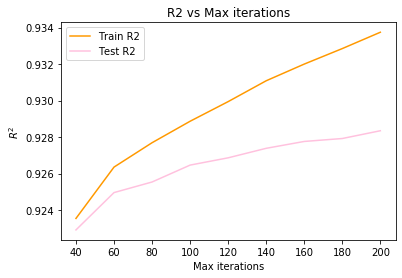

In [75]:
# Procces

max_iter = [40, 80, 120, 140, 180, 220, 260, 300, 340]
iterator = max_iter
name = 'Max iterations'

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = HistGradientBoostingRegressor(max_iter=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_mi = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [76]:
result_mi

,Max iterations,TrainScore,TestScore
0,40,0.923546,0.922916
1,60,0.926358,0.924961
2,80,0.927693,0.925541
3,100,0.928869,0.926467
4,120,0.929944,0.926866
5,140,0.931087,0.927386
6,160,0.932000,0.927762
7,180,0.932850,0.927923
8,200,0.933745,0.928349


Se observa que al incrementar el número de árboles aumenta la precisión del modelo, esto sin incurrir en overfitting pues la diferencia entre el R2 con los datos de entramiento y test es de 0.05.

#### Max leaf nodes

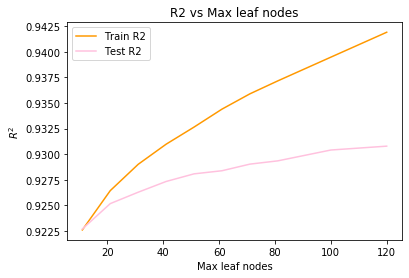

In [83]:
# Procces

max_leaf_nodes = [11, 21, 31, 41, 51, 61, 71, 81, 100, 120]
iterator = max_leaf_nodes
name = 'Max leaf nodes'

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = HistGradientBoostingRegressor(max_leaf_nodes=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_mln = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [84]:
result_mln

,Max leaf nodes,TrainScore,TestScore
0,11,0.922593,0.922683
1,21,0.926432,0.925164
2,31,0.929003,0.926277
3,41,0.930968,0.927326
4,51,0.932641,0.928071
5,61,0.934394,0.928375
6,71,0.935889,0.929022
7,81,0.937156,0.929341
8,100,0.939474,0.930400
9,120,0.941907,0.930777


Al aumentar el número máximo de hojas en cada nodo también lo hace el R2 sin overfittig por el mismo argumneto que para el número máximo de árboles.

#### Min samples leaf

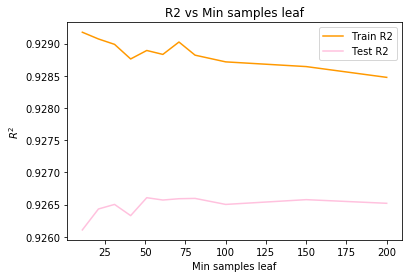

In [85]:
# Procces

min_samples_leaf = [11, 21, 31, 41, 51, 61, 71, 81, 100, 150, 200]
iterator = min_samples_leaf
name = 'Min samples leaf'

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = HistGradientBoostingRegressor(min_samples_leaf=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_msl = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [86]:
result_msl

,Min samples leaf,TrainScore,TestScore
0,11,0.929176,0.926106
1,21,0.929072,0.926431
2,31,0.928988,0.926502
3,41,0.928761,0.926328
4,51,0.928893,0.926606
5,61,0.928832,0.926570
6,71,0.929024,0.926591
7,81,0.928820,0.926595
8,100,0.928716,0.926502
9,150,0.928643,0.926576


El R2 es prácticamente invariant, de manera que este dato no afecta al modelo.

## Tunning by Grid Search CV

#### L2 regularization

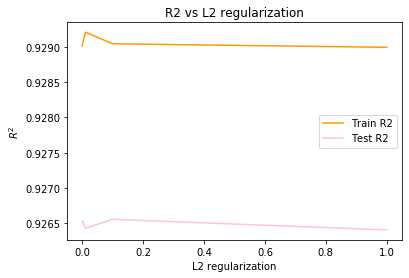

In [105]:
# Procces

l2_regularization = [0, 0.001, 0.01, 0.1, 1]
iterator = l2_regularization
name = 'L2 regularization'

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = HistGradientBoostingRegressor(l2_regularization=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_l2r = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [106]:
result_l2r

,L2 regularization,TrainScore,TestScore
0,0.000,0.929011,0.926524
1,0.001,0.929054,0.926537
2,0.010,0.929207,0.926430
3,0.100,0.929044,0.926558
4,1.000,0.928994,0.926408


La penalización de tipo L2 no afecta el modelo, auqnue tiene un máximo en 0.001

#### Loss

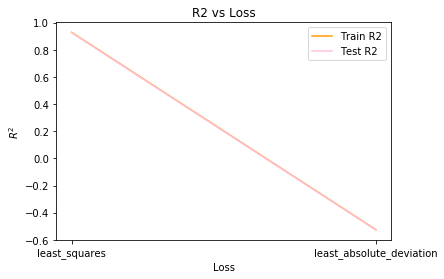

In [107]:
# Procces

loss = ['least_squares', 'least_absolute_deviation']
iterator = loss
name = 'Loss'

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = HistGradientBoostingRegressor(loss=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_loss = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [108]:
result_loss

,Loss,TrainScore,TestScore
0,least_squares,0.929202,0.926376
1,least_absolute_deviation,-0.525250,-0.527229


Es evidente que calcular el error por medio 'least square' tiene una mucho mayor precisión.

In [4]:
from sklearn.model_selection import GridSearchCV

model = HistGradientBoostingRegressor()
params = {
    'learning_rate': [0.05, 0.1, 0.3, 0.5],
    'max_iter': [100, 400, 800, 1000],
    'max_leaf_nodes': [50, 100, 300, 500, 800],
    'l2_regularization': [0.001], 
}

gscv = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    cv=5,
    verbose=10,
)

gscv.fit(X, y)

eaf_nodes=800 
[CV]  l2_regularization=0.001, learning_rate=0.3, max_iter=1000, max_leaf_nodes=800, score=0.930, total= 5.6min
[CV] l2_regularization=0.001, learning_rate=0.3, max_iter=1000, max_leaf_nodes=800 
[CV]  l2_regularization=0.001, learning_rate=0.3, max_iter=1000, max_leaf_nodes=800, score=0.932, total= 5.3min
[CV] l2_regularization=0.001, learning_rate=0.3, max_iter=1000, max_leaf_nodes=800 
[CV]  l2_regularization=0.001, learning_rate=0.3, max_iter=1000, max_leaf_nodes=800, score=0.931, total= 4.9min
[CV] l2_regularization=0.001, learning_rate=0.5, max_iter=100, max_leaf_nodes=50 
[CV]  l2_regularization=0.001, learning_rate=0.5, max_iter=100, max_leaf_nodes=50, score=0.925, total=   3.7s
[CV] l2_regularization=0.001, learning_rate=0.5, max_iter=100, max_leaf_nodes=50 
[CV]  l2_regularization=0.001, learning_rate=0.5, max_iter=100, max_leaf_nodes=50, score=0.927, total=   2.9s
[CV] l2_regularization=0.001, learning_rate=0.5, max_iter=100, max_leaf_nodes=50 
[CV]  l2_regula

GridSearchCV(cv=5, error_score=nan,
             estimator=HistGradientBoostingRegressor(l2_regularization=0.0,
                                                     learning_rate=0.1,
                                                     loss='least_squares',
                                                     max_bins=255,
                                                     max_depth=None,
                                                     max_iter=100,
                                                     max_leaf_nodes=31,
                                                     min_samples_leaf=20,
                                                     n_iter_no_change=None,
                                                     random_state=None,
                                                     scoring=None, tol=1e-07,
                                                     validation_fraction=0.1,
                                                     verbose=0,
                        

In [5]:
# Results
print('='*100)
print('Best Score:', gscv.best_score_)
print('Best params:', gscv.best_params_)
print('Best estimator', gscv.best_estimator_)
print('='*100)

Best Score: 0.9384535841902683
Best params: {'l2_regularization': 0.001, 'learning_rate': 0.05, 'max_iter': 1000, 'max_leaf_nodes': 500}
Best estimator HistGradientBoostingRegressor(l2_regularization=0.001, learning_rate=0.05,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=1000, max_leaf_nodes=500,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)


In [12]:
# Test with control data 
BestHGBR = HistGradientBoostingRegressor(
    l2_regularization=0.001,
    learning_rate=0.05,
    max_iter=1000,
    max_leaf_nodes=500
)

BestHGBR.fit(X, y)

Control data
R2 =  0.9418805006948696


In [14]:
prediction = BestHGBR.predict(X)
score = r2_score(y, prediction)

control_prediction = BestHGBR.predict(X_control)
control_score = r2_score(y_control, control_prediction)

print('='*100, '\nTrain data')
print('R2 = ', score)
print('='*100)

print('='*100, '\nControl data')
print('R2 = ', control_score)
print('='*100)

Train data
R2 =  0.9864187849563397
Control data
R2 =  0.9418805006948696


In [19]:
from sklearn.metrics import (
    mean_squared_error, mean_gamma_deviance,
    explained_variance_score, max_error,
    mean_absolute_error, median_absolute_error,
    mean_squared_log_error, mean_poisson_deviance
) 

# prediction[prediction < 0] = 0
# control_prediction[control_prediction < 0] = 0

scores = {
    'MSE': mean_squared_error,
    #'MGD': mean_gamma_deviance,
    'EVS': explained_variance_score,
    'ME': max_error,
    'MAE': mean_absolute_error,
    'MeAE': median_absolute_error,
    'MSLE': mean_squared_log_error,
    #'MPD': mean_poisson_deviance,
}

for name, score in scores.items():
    print('='*100)
    print('---', name, '---')
    print('Train data')
    print('R2 = ', score(y, prediction))
    print('Control data')
    print('R2 = ', score(y_control, control_prediction))
    print('='*100)

--- MSE ---
Train data
R2 =  1439.4545049019607
Control data
R2 =  6161.3471103404145
--- EVS ---
Train data
R2 =  0.9864288772471811
Control data
R2 =  0.9418949792265887
--- ME ---
Train data
R2 =  523.9160241242524
Control data
R2 =  816.2887904135705
--- MAE ---
Train data
R2 =  17.759343503392724
Control data
R2 =  35.292217946850336
--- MeAE ---
Train data
R2 =  1.3590804742183877
Control data
R2 =  1.6403096975355855
--- MSLE ---
Train data
R2 =  0.176677096199097
Control data
R2 =  0.23125777320649632


Se obtiene un excelente score de 0.94 en el test de control. El test de entranamiento es de 0.98 por lo que puede estar un poco sobreajustado, la diferencia es de 0.045.
